# Intro to dataset (flags.csv)

Our dataset contains information on flags of countries around the world. Each row is a country. Here are the relevant columns:

    name -- name of the country
    landmass -- which continent the country is in (1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania)
    area -- country area, in thousands of square kilometers
    population -- rounded to the nearest million
    bars -- Number of vertical bars in the flag
    stripes -- Number of horizontal stripes in the flag
    colors -- Number of different colours in the flag
    red, green, blue, gold, white, black, orange -- 0 if color absent, 1 if color present in the flag


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
flags = pd.read_csv("data/flags.csv")
flags.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [2]:
most_bars_country = flags.iloc[flags['bars'].idxmax()]['name']
highest_population_country = flags.iloc[flags['population'].idxmax()]['name']
print(most_bars_country,highest_population_country)

St-Vincent China


In [3]:
total_countries = flags.shape[0]

orange_probability = flags[flags['orange'] == 1].shape[0]/total_countries
stripe_probability = flags[flags['stripes'] > 1].shape[0]/total_countries

print(orange_probability,stripe_probability)

0.13402061855670103 0.41237113402061853


In [4]:
# calculate probabilities of sequence of heads rolls

five_heads = .5 ** 5

ten_heads = 0.5 ** 10

hundred_heads = 0.5 ** 100

print(five_heads,ten_heads,hundred_heads)

0.03125 0.0009765625 7.888609052210118e-31


In [5]:
# calculate odds of picking 3 countries with red in their flag in a row

num_red = flags[flags['red'] == 1].shape[0]
three_red = (num_red / total_countries) * ((num_red - 1)/(total_countries - 1)) * ((num_red - 2)/(total_countries - 2))
print(three_red)


0.4884855242775493


In [6]:
start = 1
end = 18000

# calculate probability of getting multiple of 100
num_hundreds = end // 100
hundred_prob = num_hundreds / end

# calculate probability of getting multiple of 70
num_seventies = end // 70
seventy_prob = num_seventies / end
print(hundred_prob,seventy_prob)

0.01 0.014277777777777778


In [7]:
# Find the probability of a flag having red or orange as a color. Assign the result to red_or_orange.
orange_flags = flags[flags['orange'] == 1]
red_flags = flags[flags['red'] == 1]
num_red_and_orange = orange_flags[orange_flags['red'] == 1].shape[0]
red_or_orange = (orange_flags.shape[0] + red_flags.shape[0] - num_red_and_orange)/total_countries

# Find the probability of a flag having at least one stripes or at least one bars. Assign the result to stripes_or_bars.
stripes = flags[flags['stripes'] >= 1]                                                                                                                              
bars = flags[flags['bars'] >= 1]
num_stripes_and_bars = stripes[stripes['bars'] >= 1].shape[0]
stripes_or_bars = (stripes.shape[0] + bars.shape[0] - num_stripes_and_bars)/total_countries

print(red_or_orange,stripes_or_bars)

0.8247422680412371 0.5927835051546392


In [8]:
# Let's say we have a coin that we're flipping. Find the probability that at least one of the first three flips comes up heads. Assign the result to heads_or.

prob_all_tails = 0.5 ** 3
heads_or = 1 - prob_all_tails
print(heads_or)

0.875


# Mission 2: calculating probabilities

In many countries, there are bikesharing programs where anyone can rent a bike from a depot, and return it at other depots throughout a city. There is one such program in Washington, D.C., in the US. We'll be looking at the number of bikes that were rented by day. Here are the relevant columns:

* dteday -- the date that we're looking at.
* casual -- the number of casual riders (people who hadn't previously signed up with the bikesharing program) that rented bikes on the day.
* registered -- the number of registered riders (people who signed up previously) that rented bikes.
* cnt -- the total number of bikes rented.

This data was collected by Hadi Fanaee-T at the University of Porto, and can be downloaded [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In [9]:
bikes = pd.read_csv("data/bike_rental_day.csv")

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# Get the probability that more than 2000 bikes were rented for any given day.
probability_over_2000 = bikes[bikes['cnt']> 2000].shape[0]/bikes.shape[0]
print(probability_over_2000)

# Get the probability that more than 4000 bikes were rented for any given day.
probability_over_4000 = bikes[bikes['cnt'] > 4000].shape[0]/bikes.shape[0]
print(probability_over_4000)

0.86593707250342
0.6183310533515732


In [11]:
# Flip a coin 3 times.  Calculate probability that 1 of 3 is heads

# There are 8 total combinations of flips (2**3).  3 of these have 1 head
coin_1_prob = 3/8
print(coin_1_prob)

0.375


In [12]:
#Find the number of combinations in which 1 day of 5 will be sunny.  probability of sunny day is 0.7
#Assign the result to sunny_1_combinations.
sunny_1_combinations = 5

We can calculate the number of combinations in which an outcome can occur k times in a set of events with a formula: $\frac{N!}{k!(N-k)!}$  In this formula, $N$ is the total number of events we have, and $k$ is the target number of times we want our desired outcome to occur

In [13]:
# Implementing and testing my own recursive factorial calculation method

import math

def factorial(n):
    if n <= 1:
        return 1
    return n * factorial(n-1)

def verify_factorial(n):
    for i in range(n):
        if factorial(i) != math.factorial(i):
            return False
    return True

print(verify_factorial(100))

True


In [14]:
def number_combinations(N, k):
    return factorial(N)/(factorial(k)*factorial(N-k))

combinations_8 = number_combinations(10,8)
combinations_9 = number_combinations(10,9)

print(combinations_8,combinations_9)

45.0 10.0


In [15]:
#Find the probability of a single combination for finding 3 days out of 5 are sunny.

combinations_3 = number_combinations(5,3)

prob_combination_3 = 0.7*0.7*0.7*0.3*0.3
print(prob_combination_3)

0.03086999999999999


The probability of a single combination occurring is given by $p^{k} * q^{N-k}$. $p$ = probability of desired outcome occurring in any given event.  $q$ = probability of other outcome occurring.  $N$ is the total number of events we have, and $k$ is the target number of times we want our desired outcome to occur.  We can verify this with our sunny days example.

In [16]:
#Write a function to find the probability of a single combination occurring.

def probability(N, k, p):
    return (p**k) * ((1-p)**(N-k))

# Use the function to calculate the probability of 8 days out of 10 having more than 4000 riders.
prob_8 = number_combinations(10,8) * probability(10,8, 0.6)

# 9 days
prob_9 = number_combinations(10,9) * probability(10,9,0.6)

# 10 days
prob_10 = number_combinations(10,10) * probability(10,10,0.6)

print(prob_8,prob_9,prob_10)


0.12093235199999997 0.04031078399999999 0.006046617599999997


# Mission 3: probability distributions

In [17]:
import pandas as pd

bikes = pd.read_csv("data/bike_rental_day.csv")


In [18]:
# Find the probability of there being more than 5000 riders in a single day (using the cnt column)

prob_over_5000 = bikes[bikes['cnt'] > 5000].shape[0] / bikes.shape[0]
print(prob_over_5000)

0.3912448700410397


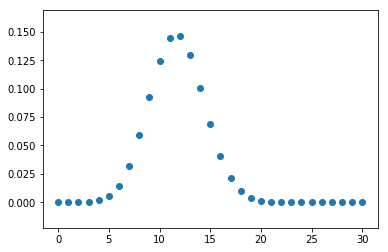

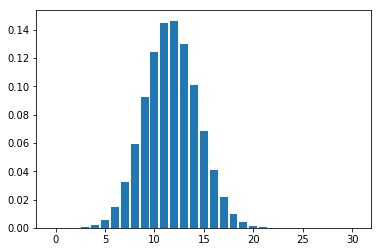

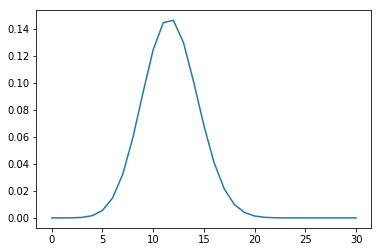

In [19]:
import math
# Using the knowledge from the last mission, create a function that can compute the probability of k outcomes out of N events occurring.

def number_combinations(N, k):
    return math.factorial(N)/(math.factorial(k) * math.factorial(N-k))

def probability(N, k, p):
    return number_combinations(N,k) * p**k * (1-p) ** (N-k)

# Use the function to find the probability of each number of outcomes in outcome_counts occurring.

# Each item in this list represents one k, starting from 0 and going up to and including 30.
outcome_counts = list(range(31))
N = 30 # 30 days
p = 0.39 # probability of having more than 5000 bikes rented in one day

outcome_probs = [probability(30, i, p) for i in outcome_counts]
outcome_probs

plt.scatter(range(0,31),outcome_probs)
plt.show()

plt.bar(range(0,31),outcome_probs)
plt.show()

plt.plot(range(0,31),outcome_probs)
plt.show()

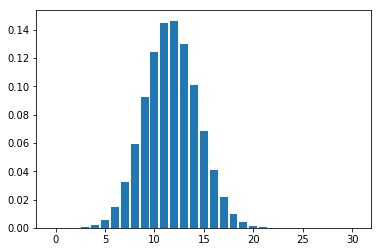

In [20]:
import scipy
from scipy import linspace
from scipy.stats import binom

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
binom_dist = binom.pmf(outcome_counts,30,0.39)

plt.bar(outcome_counts,binom_dist)
plt.show()

Sometimes we'll want to be able to tell people the expected value of a probability distribution -- the most likely result of a single sample that we look at.

To compute this: $N * p$

In [21]:
dist_mean = 30 * 0.39
print(dist_mean)

11.700000000000001


We can calculate the mean () and standard deviation () of a binomial probability distribution using these formulas:

$\mu = N * p$

$\sigma = \sqrt{N*p*q}$

In [22]:
dist_stdev = (30 * 0.39 * 0.61) ** 0.5
dist_stdev

2.671516423307182

Generate a binomial distribution, with N=10, and p=.39.
* Find the probabilities for each value in outcome_counts.
* Plot the resulting data as a bar chart.

Generate a binomial distribution, with N=100, and p=.39.
* Find the probabilities for each value in outcome_counts.
* Plot the resulting data as a bar chart.

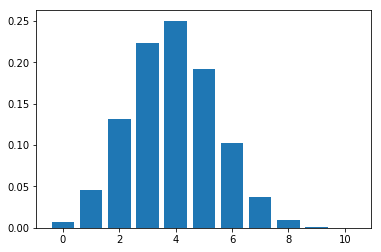

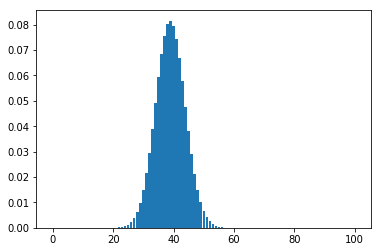

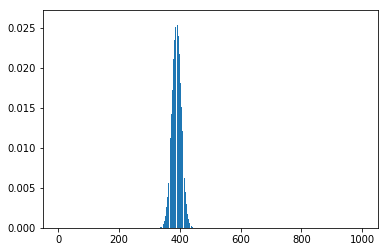

In [23]:
binom_10 = binom.pmf(range(0,11),10, 0.39)
plt.bar(range(0,11),binom_10)
plt.show()

binom_100 = binom.pmf(range(0,101),100,0.39)
plt.bar(range(0,101),binom_100)
plt.show()

binom_1000 = binom.pmf(range(0,1001),1000,0.39)
plt.bar(range(0,1001),binom_1000)
plt.show()

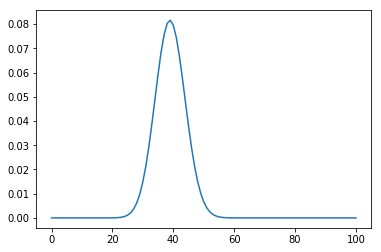

In [24]:
# Create a range of numbers from 0 to 100, with 101 elements (each number has one entry).
outcome_counts = scipy.linspace(0,100,101)

# Create a probability mass function along the outcome_counts.
outcome_probs = binom.pmf(outcome_counts,100,0.39)

# Plot a line, not a bar chart.
plt.plot(outcome_counts, outcome_probs)
plt.show()

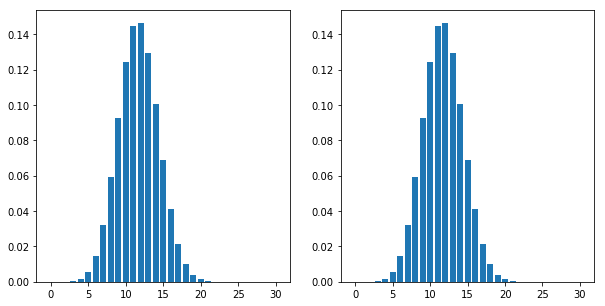

In [25]:
# practicing creating my own probability mass function for a binomial distribution
def number_combinations(N, k):
    return math.factorial(N)/(math.factorial(k)*math.factorial(N-k))

def probability(N, k, p):
    return p**k * (1-p)** (N-k) * number_combinations(N,k)

N = 30
p = 0.39

dist = [probability(N, i, p) for i in range(0,31)]

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax1.bar(range(0,31),dist)

ax2 = fig.add_subplot(122)
ax2.bar(range(0,31),binom.pmf(range(0,31),30,0.39))
plt.show()

Create a cumulative distribution where $N = 30$ and $p = .39$ and generate a line plot of the distribution.


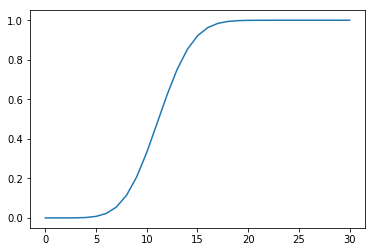

In [26]:
dist = binom.cdf(range(0,31),30,0.39)
plt.plot(range(0,31),dist)
plt.show()

If we want to figure out the number of standard deviations from the mean a value is, we just do:

$\frac{k-\mu}{\sigma}$

Remember:

$\mu = N * p$

$\sigma = \sqrt{N*p*q}$

In [27]:
#Find the probability to the left of k=16 (including 16) when N=30 and p=0.39.
left_16 = binom.cdf(16,30,0.39)

#Find the probability to the right of k=16 (including 16) when N=30 and p=0.39.
right_16 = 1 - left_16

# Mission 4: Significance testing

Now that we have decided on a test statistic, we can rewrite our hypotheses to be more precise:

Null hypothesis: $\bar{x}_b - \bar{x}_a = 0$<br />
Alternative hypothesis: $\bar{x}_b - \bar{x}_a > 0$


# Mission 5: Chi-squared testing

Each row represents a single person who was counted in the 1990 US Census, and contains information about their income and demograpics. Here are some of the relevant columns:

* age -- how old the person is
* workclass -- the type of sector the person is employed in.
* race -- the race of the person.
* sex -- the gender of the person, either Male or Female.

The entire dataset has 32561 rows, and is a sample of the full Census. Of the rows, 10771 are Female, and 21790 are Male. These numbers look a bit off, because the full Census shows that the US is about 50% Male and 50% Female. So our expected values for number of Males and Females would be 16280.5 each.

![table](table.png)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# In the last screen, our observed values were 10771 Females, and 21790 Males.
# Our expected values were 16280.5 Females and 16280.5 Males.

female_diff = (10771-16280.5)/16280.5
male_diff = (21790-16280.5)/16280.5
print(female_diff,male_diff)

-0.33841098246368356 0.33841098246368356


We can calculate $\chi^2$, the chi-squared value, by adding up all of the squared differences between observed and expected values.

In [31]:
#Compute the difference in number of observed Females vs number of expected Females using the updated technique. Assign the result to female_diff.
#Compute the difference in number of observed Males vs number of expected Males using the updated technique. Assign the result to male_diff.
#Add male_diff and female_diff together and assign to the variable gender_chisq.

female_diff = (10771-16280.5)**2/16280.5
male_diff = (21790-16280.5)**2/16280.5
gender_chisq = female_diff + male_diff
print(gender_chisq)

3728.950615767329


0.1328122600657228 0.1328122600657228
0.23993427720278862 0.23993427720278862
0.011194373637173306 0.011194373637173306
0.00812321488897761 0.00812321488897761
2.3476091029145296 2.3476091029145296
0.20308037222444028 0.20308037222444028
1.0460520254291945 1.0460520254291945
1.0300819999385769 1.0300819999385769
0.49201498725469117 0.49201498725469117
0.06094714535794355 0.06094714535794355
0.5255520407849882 0.5255520407849882
0.05713890851018089 0.05713890851018089
0.011194373637173306 0.011194373637173306
0.009597371088111544 0.009597371088111544
1.7855870519947177 1.7855870519947177
0.18919873468259574 0.18919873468259574
0.45958355087374464 0.45958355087374464
0.03686926077208931 0.03686926077208931
0.9674303614753846 0.9674303614753846
0.21745339516599613 0.21745339516599613
0.0012438192930192562 0.0012438192930192562
0.0007524338933079451 0.0007524338933079451
0.2323178035072633 0.2323178035072633
0.7364792236110684 0.7364792236110684
0.09104450109026135 0.09104450109026135
0.01

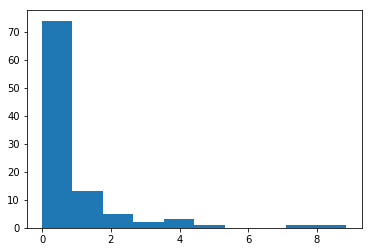

In [47]:
chi_squared_values = []
total = 32561
exp = total / 2

for i in range(1000):
    male_fem = [1 if np.random.random() >= 0.5 else 0 for _ in range(total)]
    males = sum([1 for each in male_fem if each == 0])
    females = sum(male_fem)
    male_diff = (males-exp)**2/exp
    female_diff = (females-exp)**2/exp
    #print(male_diff,female_diff)

    chi_sq = male_diff + female_diff
    chi_squared_values.append(chi_sq)

plt.hist(chi_squared_values)
plt.show()

(array([721., 164.,  57.,  34.,   9.,   9.,   2.,   3.,   0.,   1.]),
 array([3.07115875e-05, 1.19969903e+00, 2.39936734e+00, 3.59903566e+00,
        4.79870397e+00, 5.99837229e+00, 7.19804060e+00, 8.39770892e+00,
        9.59737723e+00, 1.07970455e+01, 1.19967139e+01]),
 <a list of 10 Patch objects>)

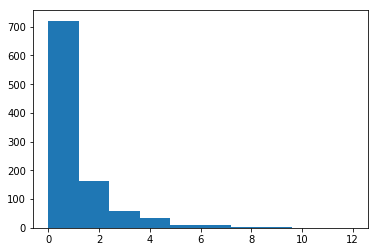